#**DIGIT RECOGNIZER**

Built a Simple Neural Network from Scratch (NumPy) for MNIST Digit Recognition!
Ever wondered how computers recognize handwritten digits? I dove into the fundamentals by implementing a basic neural network in Python using NumPy, to classify digits in the classic MNIST dataset.
This project helped me gain a deeper understanding of:
Neural Network Architecture: Building a network with an input layer (representing pixels), a hidden layer for processing features, and an output layer for digit classification.
Activation Functions: Applying functions like ReLU to introduce non-linearity and improve learning.
Cost Function and Backpropagation: Using techniques like gradient descent to optimize the network's weights and biases for better accuracy.


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [3]:

data=pd.read_csv('/content/drive/MyDrive/COGNORISE/TASK 7 DIGIT RECOGNIZER/train.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape




1.Converts the data into a numpy array

2.Shuffles the data to introduce randomness.

3.Splits the data into a development set (data_dev) and a training set (data_train).

4.Normalizes the input features in both sets by dividing by 255.

5.Extracts the labels (Y_dev, Y_train) and the input features (X_dev, X_train) for both sets.

6.Determines the number of training examples (m_train) in the training set.



In [5]:
Y_train

array([5, 7, 8, ..., 7, 8, 7])

In [7]:
def init_params():
  W1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  return W1, b1, W2, b2

def ReLU(Z):
  return np.maximum(Z, 0)
def softmax(Z):
  A = np.exp(Z) / sum(np.exp(Z))
  return A
def forward_prop(W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2
def ReLU_deriv(Z):
  return Z > 0
def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1 / m * dZ2.dot(A1.T)
  db2 = 1 / m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
  dW1 = 1 / m * dZ1.dot(X.T)
  db1 = 1 / m * np.sum(dZ1)
  return dW1, db1, dW2, db2
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1, b1, W2, b2


In the provided code snippets, we have functions that handle initializing parameters, applying activation functions like ReLU and softmax, performing forward propagation, calculating gradients during backward propagation, and updating the model parameters.

init_params(): Initializes the weights and biases for the neural network layers.


ReLU(Z): Rectified Linear Unit activation function that introduces non-linearity.


softmax(Z): Softmax function to convert raw scores into probabilities.


forward_prop(): Executes the forward pass of the neural network.


ReLU_deriv(Z): Derivative of ReLU function for backpropagation.


one_hot(Y): Converts target labels into one-hot encoded vectors.


backward_prop(): Computes gradients during backpropagation.


update_params(): Updates the model parameters using gradient descent.


The code is structured into functions that handle different aspects of a neural network training process. From initialization to forward and backward propagation, each function plays a crucial role in training the neural network model.

In [14]:
def get_predictions(A2):
  return np.argmax(A2, 0)
def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y) / Y.size
def gradient_descent(X, Y, alpha, iterations):
  W1, b1, W2, b2 = init_params()
  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2,alpha)
    if i % 10 == 0:
      print("Iteration: ", i)
      predictions = get_predictions(A2)
      print(get_accuracy(predictions, Y))
  return W1, b1, W2, b2



Forward Propagation: In this step, the input data is passed through the network to make predictions.



Backward Propagation: This step involves calculating the gradients of the loss function with respect to the weights to update them.



Gradient Descent: The optimization algorithm used to minimize the loss function by adjusting the weights iteratively.

get_predictions(A2): Returns the index of the maximum value in A2.





get_accuracy(predictions, Y): Calculates the accuracy of predictions compared to the actual values Y.





gradient_descent(X, Y, alpha, iterations): Implements the training loop using forward and backward propagation.

In [15]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[4 4 0 ... 4 4 4] [5 7 8 ... 7 8 7]
0.1328780487804878
Iteration:  10
[7 7 5 ... 4 9 8] [5 7 8 ... 7 8 7]
0.23865853658536584
Iteration:  20
[7 7 2 ... 4 9 8] [5 7 8 ... 7 8 7]
0.3338780487804878
Iteration:  30
[8 7 2 ... 4 9 3] [5 7 8 ... 7 8 7]
0.4210243902439024
Iteration:  40
[8 7 2 ... 4 9 3] [5 7 8 ... 7 8 7]
0.48121951219512193
Iteration:  50
[8 7 2 ... 4 9 3] [5 7 8 ... 7 8 7]
0.5250731707317073
Iteration:  60
[8 7 2 ... 4 6 3] [5 7 8 ... 7 8 7]
0.558439024390244
Iteration:  70
[3 7 2 ... 4 6 3] [5 7 8 ... 7 8 7]
0.5843170731707317
Iteration:  80
[3 7 2 ... 4 6 7] [5 7 8 ... 7 8 7]
0.6061951219512195
Iteration:  90
[3 7 2 ... 4 6 7] [5 7 8 ... 7 8 7]
0.6264390243902439
Iteration:  100
[3 7 2 ... 4 6 7] [5 7 8 ... 7 8 7]
0.6440975609756098
Iteration:  110
[3 7 2 ... 4 6 7] [5 7 8 ... 7 8 7]
0.6605365853658537
Iteration:  120
[3 7 2 ... 4 8 7] [5 7 8 ... 7 8 7]
0.6742926829268293
Iteration:  130
[3 7 2 ... 4 8 7] [5 7 8 ... 7 8 7]
0.6878780487804877
Iteration:  140


The code snippet assigns the optimized values of the parameters (W1, b1, W2, b2) obtained after running the Gradient Descent algorithm on the training data (X_train, Y_train) for 500 iterations with a learning rate of 0.10.

Gradient Descent: An iterative optimization algorithm that adjusts the parameters of a model by moving in the direction of the steepest descent of the cost function.



Parameters (W1, b1, W2, b2): Represent the weights and biases of the model that are updated during the training process.


Learning Rate (0.10): Determines the step size taken in the direction of the gradient to update the parameters.


Iterations (500): The number of times the algorithm updates the parameters to minimize the cost function.

In [16]:
def make_predictions(X, W1, b1, W2, b2):
  _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
  predictions = get_predictions(A2)
  return predictions
def test_prediction(index, W1, b1, W2, b2):
  current_image = X_train[:, index, None]
  prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
  label = Y_train[index]
  print("Prediction: ", prediction)
  print("Label: ", label)
  current_image = current_image.reshape((28, 28)) * 255
  plt.gray()
  plt.imshow(current_image, interpolation='nearest')
  plt.show()


The provided code consists of two main functions:


*make_predictions(X, W1, b1, W2, b2): This function takes input data X and the weights and biases of the neural network layers (W1, b1, W2, b2). It performs forward propagation using the forward_prop function and then extracts predictions using get_predictions.







*test_prediction(index, W1, b1, W2, b2): This function is used to test predictions on a specific index of the training data. It retrieves the image at the given index, makes predictions using make_predictions, and then displays the image along with the predicted label.

Prediction:  [3]
Label:  5


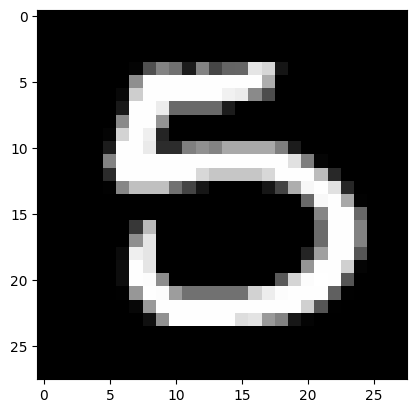

Prediction:  [7]
Label:  7


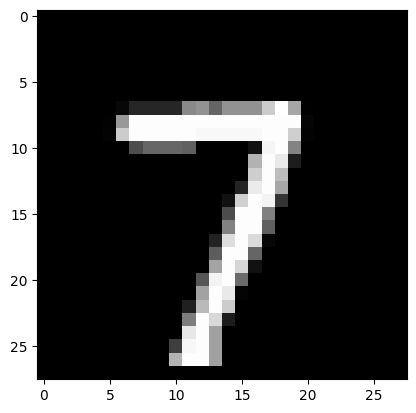

Prediction:  [8]
Label:  8


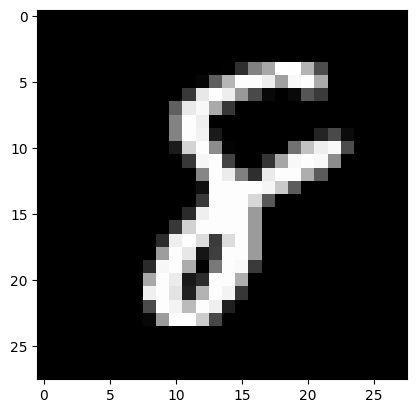

Prediction:  [5]
Label:  3


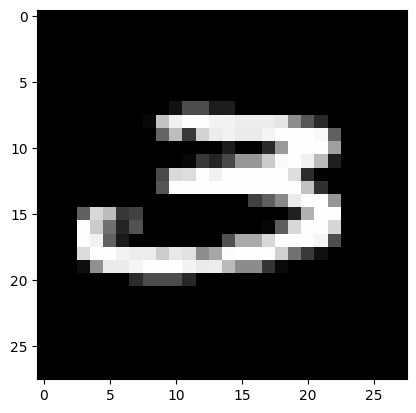

In [17]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)


The code snippet provided calls the test_prediction function four times with different input values (0, 1, 2, 3) and the weights (W1, W2) and biases (b1, b2) of the neural network as arguments. Each call to test_prediction generates a prediction based on the corresponding input value and the neural network's parameters.

#**Digit Recognizer using Machine Learning**

**Introduction**


In this code example, we will build a digit recognizer using machine learning. We will train a neural network model to classify handwritten digits from the MNIST dataset. The goal is to accurately predict the digit represented by an input image.

**Key Concepts**



**Neural Network**: A neural network is a computational model inspired by the structure and function of the human brain. It consists of interconnected nodes, called neurons, organized in layers. Each neuron takes input, performs a computation, and produces an output.


**Forward Propagation**: Forward propagation is the process of passing input data through the neural network to obtain the predicted output. It involves computing the weighted sum of inputs, applying an activation function, and passing the result to the next layer.

def forward_prop(W1, b1, W2, b2, X):


         Z1 = W1.dot(X) + b1


         A1 = ReLU(Z1)


         Z2 = W2.dot(A1) + b2


         A2 = softmax(Z2)


         return Z1, A1, Z2, A2


**Backward Propagation**: Backward propagation, also known as backpropagation, is the process of updating the weights and biases of the neural network based on the difference between the predicted output and the actual output. It involves calculating the gradients of the loss function with respect to the weights and biases and using these gradients to update the parameters.


def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):

        one_hot_Y = one_hot(Y)
        dZ2 = A2 - one_hot_Y
        dW2 = 1 / m * dZ2.dot(A1.T)
        db2 = 1 / m * np.sum(dZ2)
        dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
        dW1 = 1 / m * dZ1.dot(X.T)
        db1 = 1 / m * np.sum(dZ1)
        return dW1, db1, dW2, db2



**ReLU Activation Function**: ReLU stands for Rectified Linear Unit. It is an activation function commonly used in neural networks. ReLU returns the input if it is positive, and zero otherwise. It helps introduce non-linearity to the model, allowing it to learn complex patterns.




**Softmax Activation Function**: Softmax is an activation function used in the output layer of a neural network for multi-class classification problems. It converts the output values into probabilities, where each value represents the probability of the input belonging to a particular class.


**Gradient Descent**: Gradient descent is an optimization algorithm used to minimize the loss function of a neural network. It iteratively adjusts the weights and biases in the direction of steepest descent of the loss function to find the optimal values.




def gradient_descent(X, Y, alpha, iterations):


     W1, b1, W2, b2 = init_params()
     for i in range(iterations):
          Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
          dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
          W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2,alpha)
          if i % 10 == 0:
               print("Iteration: ", i)
               predictions = get_predictions(A2)
               print(get_accuracy(predictions, Y))
       return W1, b1, W2, b2


**The code is structured as follows:**

Import the necessary libraries: pandas, numpy, and matplotlib.


Load the MNIST dataset using pandas.


Preprocess the data by shuffling, splitting into training and development sets, and normalizing the pixel values.


Define helper functions for initializing parameters, activation functions, forward propagation, backward propagation, and updating parameters.


Implement the gradient descent algorithm to train the neural network.


Make predictions on the training set and visualize the results.

**Conclusion**



In this code example, we built a digit recognizer using machine learning. We trained a neural network model to classify handwritten digits from the MNIST dataset. We learned about key concepts such as neural networks, forward propagation, backward propagation, activation functions, and gradient descent. By understanding and implementing these concepts, we can create powerful machine learning models for various tasks, including image classification.